In [19]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [36]:
# clean data
df['date']=pd.to_datetime(df['date'])
df['month']=df['date'].map(lambda x: f'{x.year}-{("0"+str(x.month))[-2:]}')
monthly_sales=df.groupby('month')['sales'].sum()
monthly_sales.head()

month
2013-01    454904
2013-02    459417
2013-03    617382
2013-04    682274
2013-05    763242
Name: sales, dtype: int64

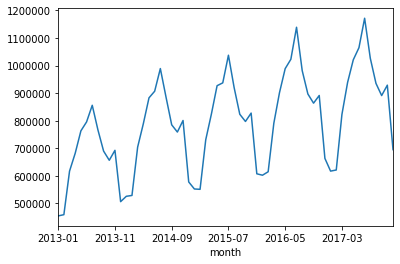

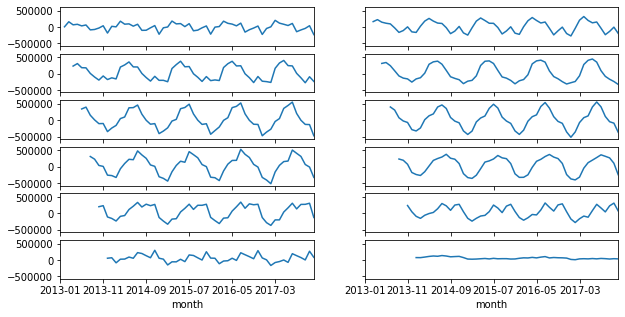

In [32]:
# visualize
monthly_sales.plot()
fig, ax=plt.subplots(6, 2, figsize=(10, 5), sharex=True, sharey=True)
for each_diff in range(0, 12): 
    monthly_sales.diff(each_diff+1).plot(ax=ax[int(each_diff/2)][each_diff%2])

In [42]:
# pick 12 lags
monthly_df=pd.DataFrame(monthly_sales)
for each_lag in range(1, 13): 
    monthly_df['lag'+str(each_lag)]=monthly_df['sales'].diff(each_lag)
monthly_df.dropna(inplace=True)

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStoppping
from tensorflow.keras.utils import np_utils
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-b151393737a6>", line 11, in <module>
    from tensorflow.keras.callbacks import EarlyStoppping
ImportError: cannot import name 'EarlyStoppping' from 'tensorflow.keras.callbacks' (C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\keras\api\_v1\keras\callbacks\__init__.py)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ImportError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IP

ImportError: cannot import name 'EarlyStoppping' from 'tensorflow.keras.callbacks' (C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\keras\api\_v1\keras\callbacks\__init__.py)

In [ ]:
X=monthly_df.drop('sales')
y=monthly_df['sales']
X_train, y_train, X_test, y_test=train_test_Split(X, y)